In [15]:
import networkx as nx
import itertools
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

def findsubsets(s, n):
    return list(itertools.combinations(s, n))

In [16]:
shc = nx.Graph()

In [17]:
shc.add_edge(1, 2)
shc.add_edge(1, 3)
shc.add_edge(1, 4)
shc.add_edge(2, 3)
shc.add_edge(2, 5)
shc.add_edge(4, 6)
shc.add_edge(4, 7)
shc.add_edge(5, 6)
shc.add_edge(5, 7)
shc.add_edge(6, 7)

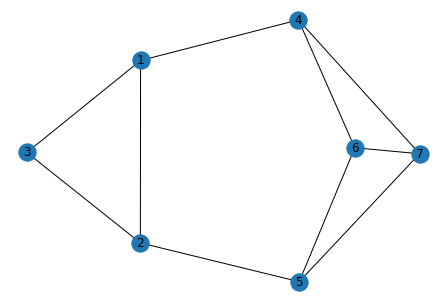

In [18]:
nx.draw(shc, with_labels=True)

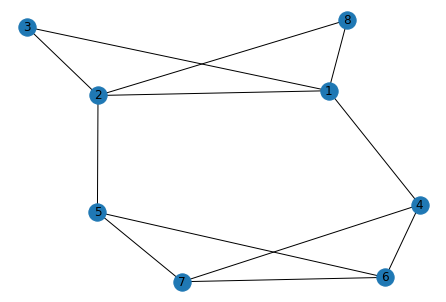

In [19]:
HC = nx.complement(nx.complement(shc))
HC.add_edge(1, 8)
HC.add_edge(2, 8)
nx.draw(HC, with_labels=True)

found an odd hole/anti-hole of nodes (1, 2, 4, 5, 6). Complement: 0
found an odd hole/anti-hole of nodes (1, 2, 4, 5, 6). Complement: 1


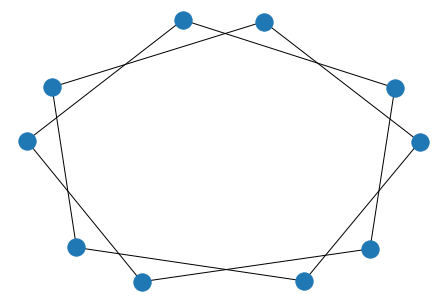

In [20]:

for anti_hole, G in enumerate([HC, nx.complement(HC)]):
    for i in [5, 7]:
        for sub in findsubsets(G.nodes, i):
            sub_G = G.subgraph(sub)
            try:
                assert len(nx.find_cycle(sub_G)) == i
            except BaseException:
                continue

            if nx.triangles(sub_G) != 0:
                print(f"found an odd hole/anti-hole of nodes {sub}. Complement: {anti_hole}")
                nx.draw(sub_G)
                break

In [21]:
print(nx.greedy_color(HC, 'DSATUR'))

{1: 0, 2: 1, 3: 2, 8: 2, 4: 1, 5: 0, 6: 2, 7: 3}
